# Importing Packages

In [42]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data Loading and Exploration

In [6]:
dataset = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
dataset.info()
# No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
dataset.describe(include=['O'])
# There is some duplicates

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
dataset.duplicated().sum()

418

In [11]:
dataset["sentiment"].value_counts()
# Dataset is balanced

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Data Cleaning and Preprocessing

In [12]:
dataset.drop_duplicates(inplace= True)
dataset.duplicated().sum()

0

In [14]:
all_stopwords = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_text(sentence):
    sentence = sentence.lower() # Lowercasing
    sentence = re.sub("<.*?>", " ", sentence)
    sentence = re.sub("[^a-zA-Z0-9]"," ", sentence) # Removing non-letters, numbers
    sentence = re.sub(r"\s+", " ", sentence) # Replacing multiple spaces, tabs with just one space
    words = word_tokenize(sentence)
    sentence = ""
    for word in words:
        if word not in all_stopwords:
            word = lemmatizer.lemmatize(word)
            sentence = sentence + word + " "
    sentence = sentence.rstrip()
    return sentence

In [15]:
preprocess_text("Ahmed is a    good            boy 5 f@!! <br>")

'ahmed good boy 5 f'

In [16]:
dataset["preprocessed"] = dataset["review"].apply(preprocess_text)

In [17]:
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_df=0.9,
    min_df=5
)
X_tfidf = tfidf.fit_transform(dataset["preprocessed"])

In [18]:
X_tfidf.data[0]

0.07933570534101338

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, dataset["sentiment"], test_size=0.2, random_state=42)

In [25]:
X_train[0].data

array([0.1475409 , 0.15139762, 0.29869684, 0.15139762, 0.13970168,
       0.13382421, 0.27380748, 0.1301233 , 0.13382421, 0.14189773,
       0.11541775, 0.1246497 , 0.13778091, 0.15376324, 0.23789524,
       0.12353985, 0.12626658, 0.15139762, 0.14592402, 0.12543686,
       0.12217485, 0.11290269, 0.12856132, 0.10844333, 0.09403867,
       0.10791862, 0.0969624 , 0.07837276, 0.10139829, 0.10478059,
       0.15139762, 0.12185176, 0.09288277, 0.08493741, 0.09388287,
       0.15401232, 0.07441607, 0.07875358, 0.05503808, 0.05772216,
       0.06623198, 0.08579762, 0.06436395, 0.1113753 , 0.12217485,
       0.05555225, 0.0436704 , 0.06724515, 0.05804879, 0.08090225,
       0.05700937, 0.06135113, 0.07210035, 0.05421377, 0.0609471 ,
       0.04967671, 0.03754768, 0.14085279, 0.22117628, 0.14682286,
       0.03892548, 0.09505927, 0.03675698, 0.09288277, 0.09206029,
       0.08071579, 0.08795967, 0.08068207, 0.03215994, 0.03632713,
       0.0337576 , 0.02916836, 0.03991638, 0.05775157, 0.04849

In [27]:
y_train[0]

'positive'

# Logistic Regression

In [29]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr_model.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.8945245537965111

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4939
    positive       0.88      0.91      0.90      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



# Naiive Bayes Model

In [36]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [37]:
y_pred_nb = nb_model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred_nb)

0.8846425330241

In [39]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4939
    positive       0.88      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



# Most frequent words

In [49]:
pos_reviews = dataset[dataset["sentiment"]=="positive"]["preprocessed"]
neg_reviews = dataset[dataset["sentiment"]=="negative"]["preprocessed"]

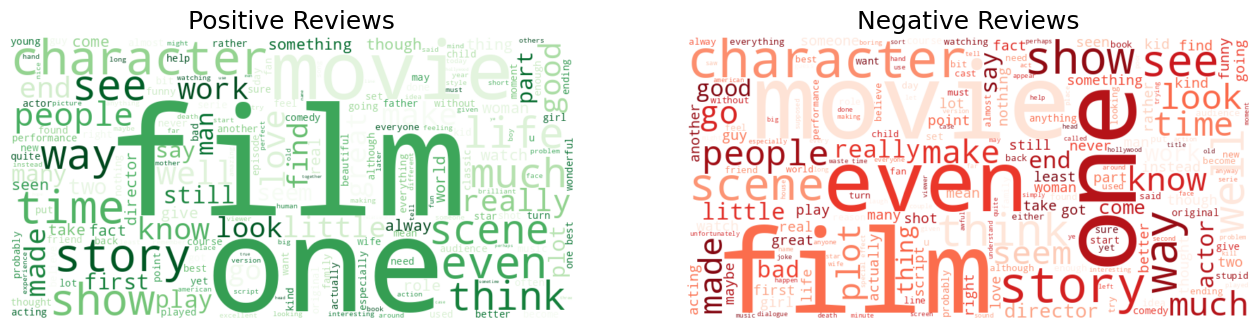

In [50]:
from wordcloud import WordCloud

# Positive words
pos_text = " ".join(pos_reviews)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(pos_text)

# Negative words
neg_text = " ".join(neg_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Positive Reviews", fontsize=18)

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Negative Reviews", fontsize=18)

plt.show()